In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!ls /content/drive/MyDrive/

 1730233408150.jpg
'500 rupees'
 affidavit
 ayz.docx
'Brown Blue Simple Professional CV  Graphic Designer Resume_20251014_152140_0000.png'
 brute.pdf
'Ch1 Introduction (1).pptx'
'Ch1 Introduction.pptx'
 Classroom
 cnic
'cnic (1)'
'cnic (2)'
'cnic (3)'
'Colab Notebooks'
'Communication technologies available in Pakistan.docx'
'comp assig 1.vsdx'
 data.csv
'DPP SIR AMIR ONLINE CLASS RECORDINGS'
'DS 02.gdoc'
'DS 04 (1).gdoc'
'DS 04.gdoc'
'DS 08 (1).gdoc'
'DS 08.gdoc'
'Functional English-1 - 26 Oct 23.gdoc'
'Functional English-1 - 26 Oct 23.pdf'
'Functional English-1.docx'
'Hotel Management System.docx'
'How to Set Up Email on Mozilla Thunderbird.pdf'
'IMG-20251015-WA0061 (1).jpg'
 IMG-20251015-WA0061.jpg
'IMG-20251219-WA0113 (1).jpg'
'IMG-20251219-WA0113 (2).jpg'
'IMG-20251219-WA0113 (3).jpg'
'IMG-20251219-WA0113 (4).jpg'
 IMG-20251219-WA0113.jpg
 Internship
'internship form'
'LinkedIn Posts - iBixare.gsheet'
'make spreadsheet.gsheet'
'Ooop 11.docx'
'payment DEN'
'pf 11.docx'
 project.docx

In [12]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
X = df.drop('price', axis=1)

In [15]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [17]:
X = df.drop('price', axis=1)
y = df['price']


In [19]:
X = X.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

In [20]:
X = X.fillna(X.mean())

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 210908.17325009225
RMSE: 993439.3625461488


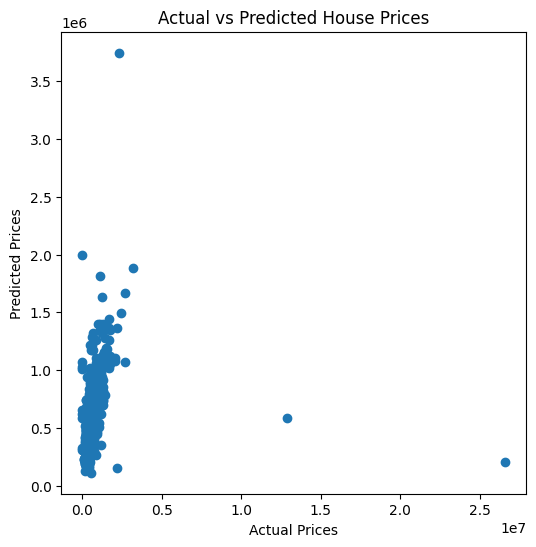

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()